Import Modul 

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Memuat Data

In [5]:
df = pd.read_excel('DATA RUMAH.xlsx')
df.head()

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3


In [6]:
df.shape

(1010, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NO          1010 non-null   int64 
 1   NAMA RUMAH  1010 non-null   object
 2   HARGA       1010 non-null   int64 
 3   LB          1010 non-null   int64 
 4   LT          1010 non-null   int64 
 5   KT          1010 non-null   int64 
 6   KM          1010 non-null   int64 
 7   GRS         1010 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.2+ KB


In [8]:
df = df.loc[:,['LB', 'LT', 'KT', 'KM', 'GRS', 'HARGA']]
df.head()

,LB,LT,KT,KM,GRS,HARGA
0,220,220,3,3,0,3800000000
1,180,137,4,3,2,4600000000
2,267,250,4,4,4,3000000000
3,40,25,2,2,0,430000000
4,400,355,6,5,3,9000000000


In [9]:
df.isnull().sum()

LB       0
LT       0
KT       0
KM       0
GRS      0
HARGA    0
dtype: int64

In [10]:
df.describe()

,LB,LT,KT,KM,GRS,HARGA
count,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1.010000e+03
mean,276.539604,237.432673,4.668317,3.607921,1.920792,7.628987e+09
std,177.864557,179.957604,1.572776,1.420066,1.510998,7.340946e+09
min,40.000000,25.000000,2.000000,1.000000,0.000000,4.300000e+08
25%,150.000000,130.000000,4.000000,3.000000,1.000000,3.262500e+09
50%,216.500000,165.000000,4.000000,3.000000,2.000000,5.000000e+09
75%,350.000000,290.000000,5.000000,4.000000,2.000000,9.000000e+09
max,1126.000000,1400.000000,10.000000,10.000000,10.000000,6.500000e+10


Data Informasi :
count: jumlah entri non-NA/null.
mean : nilai rata-rata.
std  : standar deviasi.
min  : nilai minimum.
25%  : kuartil pertama atau Q1.
50%  : median atau Q2.
75%  : kuartil ketiga atau Q3.
max  : nilai maksimum.

<function matplotlib.pyplot.show(close=None, block=None)>

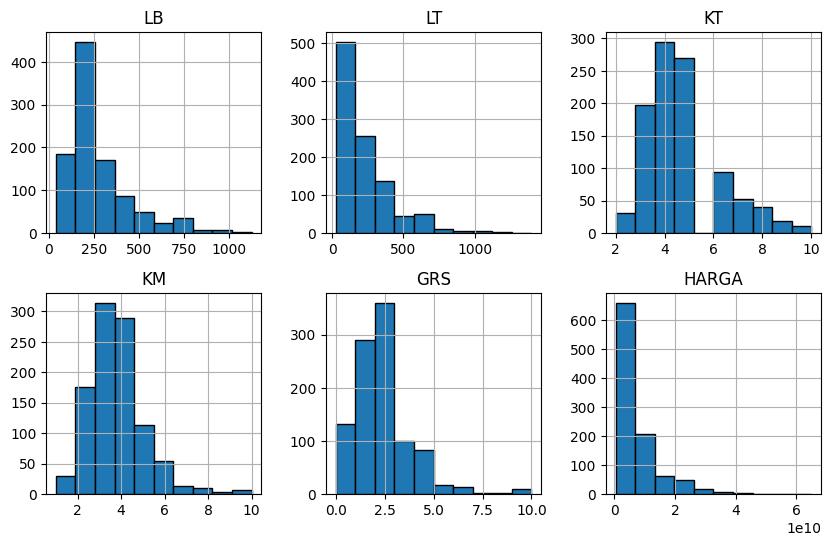

In [11]:
viz= df[['LB','LT','KT','KM','GRS','HARGA']]
viz.hist(layout=(2, 3), figsize=(10, 6), bins=10, edgecolor='black')
plt.show

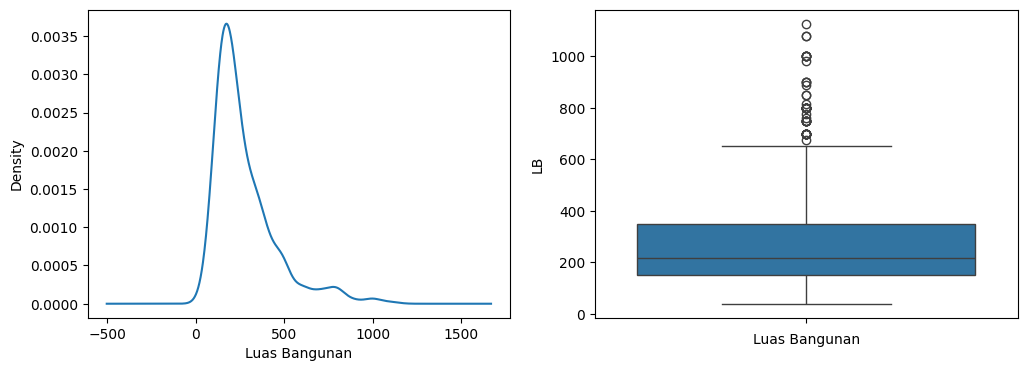

In [12]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['LB'].plot(kind='kde')
plt.xlabel("Luas Bangunan")

f.add_subplot(1,2,2 )
sns.boxplot(df['LB'])
plt.xlabel("Luas Bangunan")

plt.show()

* sebagian besar luas bangunan berada di kisaran angka 200


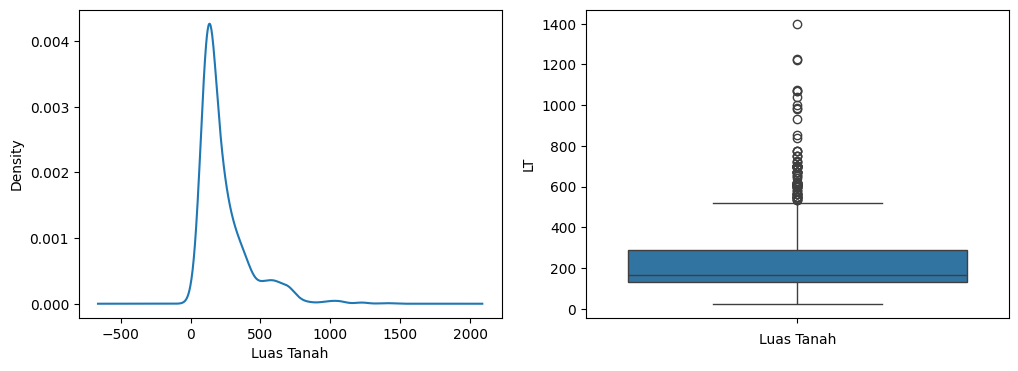

In [13]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['LT'].plot(kind='kde')
plt.xlabel("Luas Tanah")
f.add_subplot(1,2,2)
sns.boxplot(df['LT'])
plt.xlabel("Luas Tanah")
plt.show()

* sebagian besar luas tanah berada di kisaran angka 200
* 

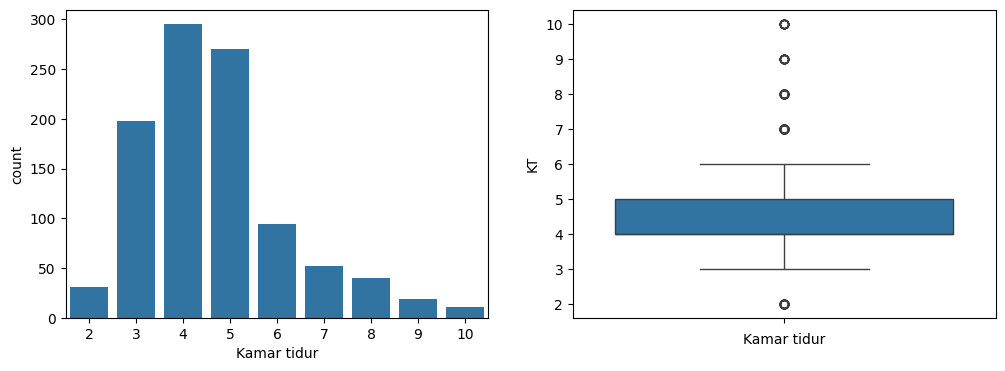

In [14]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(x=df['KT'])
plt.xlabel("Kamar tidur")
f.add_subplot(1,2,2)
sns.boxplot(df['KT'])
plt.xlabel("Kamar tidur")
plt.show()

* Menunjukkan Jumlah Kamar Tidur terbanyak adalah 4 dan 5
* 

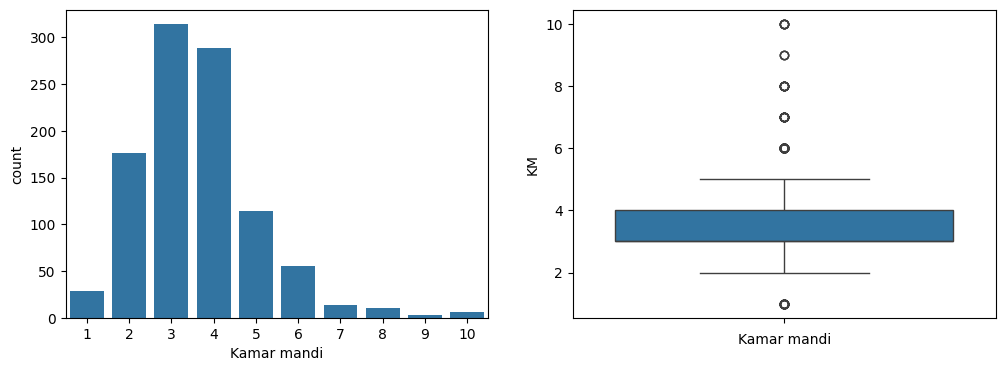

In [15]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(x=df['KM'])
plt.xlabel("Kamar mandi")
f.add_subplot(1,2,2)
sns.boxplot(df['KM'])
plt.xlabel("Kamar mandi")
plt.show()

* Menunjukan jumlah kamar mandi terbanyak adalah adalah 3 dan 4
* 

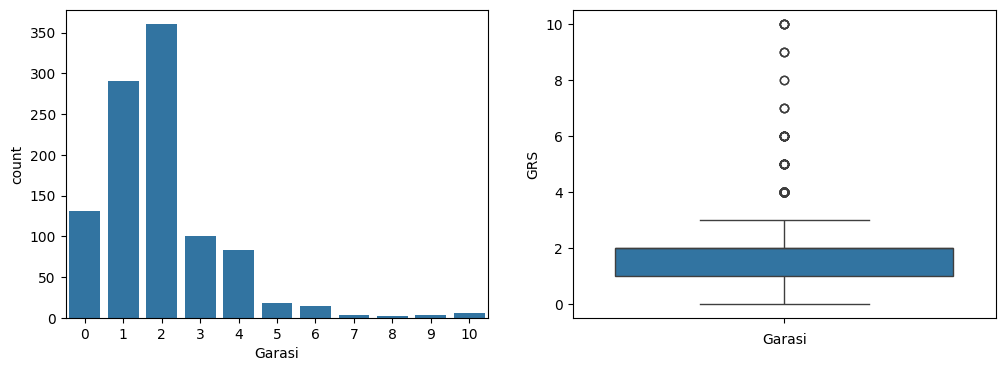

In [16]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(x=df['GRS'])
plt.xlabel("Garasi")
f.add_subplot(1,2,2)
sns.boxplot(df['GRS'])
plt.xlabel("Garasi")
plt.show()

* Menunjukan jumlah garasi adalah 1 dan 2
* 

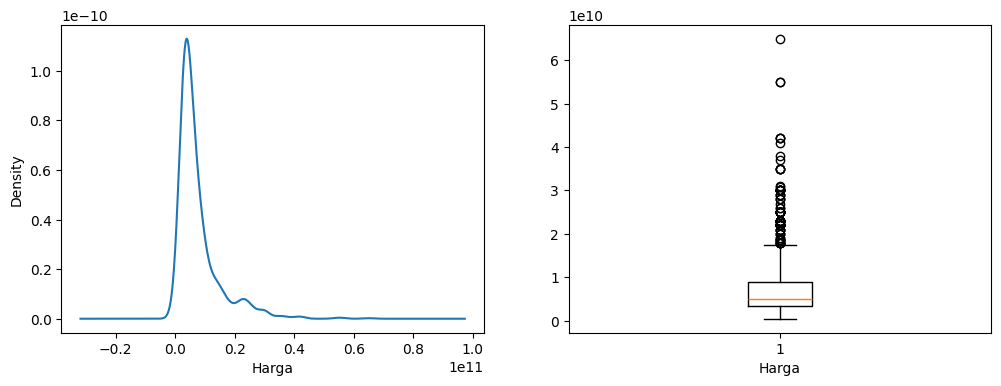

In [17]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['HARGA'].plot(kind='kde')
plt.xlabel("Harga")
f.add_subplot(1,2,2)
plt.boxplot(df['HARGA'])
plt.xlabel("Harga")
plt.show()

* Jika berkaca pada data semua memiliki korelasi nya masing-masing.
* 

<Figure size 1000x800 with 0 Axes>

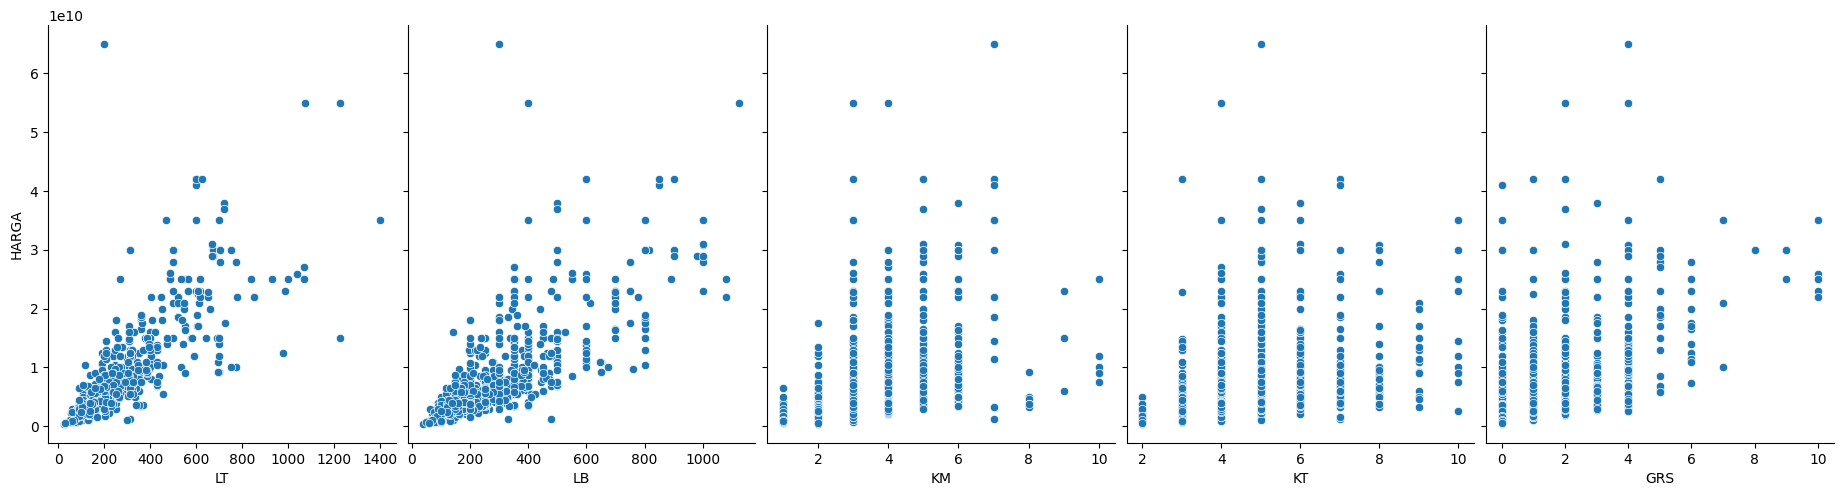

In [18]:
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['LT', 'LB', 'KM', 'KT', 'GRS'], y_vars=['HARGA'], size=5, aspect=0.75)
plt.show()

* Pairplot menampilkan hubungan antara variable LT, LB, KM, KT, GRS, dan variable Target Harga

In [19]:
df.corr().style.background_gradient().format("{:.1%}")

,LB,LT,KT,KM,GRS,HARGA
LB,100.0%,74.0%,44.4%,53.0%,49.2%,74.7%
LT,74.0%,100.0%,42.5%,38.9%,48.4%,81.0%
KT,44.4%,42.5%,100.0%,66.9%,28.0%,32.3%
KM,53.0%,38.9%,66.9%,100.0%,34.5%,40.5%
GRS,49.2%,48.4%,28.0%,34.5%,100.0%,48.5%
HARGA,74.7%,81.0%,32.3%,40.5%,48.5%,100.0%


DataFrame correlation menampilkan korelasi antar-fitur pada dataset (df). Pewarnaan gradien dan format persentase memberikan visualisasi yang jelas tentang tingkat hubungan antar-variabel.

In [20]:
x = df.drop(columns=['HARGA'])
y = df['HARGA']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=4)
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((606, 5), (404, 5), (606,), (404,))

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [23]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[ 1.05741763e+07  2.56909842e+07 -6.26072834e+08  4.28022537e+08
  2.64833032e+08]
-482584002.87249184


In [24]:
coef_dict = {
    'features':x.columns,
    'coef_value':lin_reg.coef_
}
coef = pd.DataFrame(coef_dict, columns = ['features', 'coef_value'])
coef

,features,coef_value
0,LB,1.057418e+07
1,LT,2.569098e+07
2,KT,-6.260728e+08
3,KM,4.280225e+08
4,GRS,2.648330e+08


In [25]:
y_pred = lin_reg.predict(X_test)
print("Accuracy %.2f%%" % (lin_reg.score(X_test, y_test)*100))

Accuracy 65.64%


In [26]:
print("Rumah yang ingin Bambang beli di Jaksel berharga sekitar Rp.{:,}".format(math.floor(lin_reg.predict([[150, 145, 4, 2, 1]]))))

Rumah yang ingin Bambang beli di Jaksel berharga sekitar Rp.3,445,321,921
